In [1]:
import numpy as np
import pandas as pd


In [3]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4073,ham,A lot of this sickness thing going round. Take...,NaN,NaN,NaN
3154,ham,Ok...,NaN,NaN,NaN
3033,ham,Get ready for &lt;#&gt; inches of pleasure...,NaN,NaN,NaN
5006,ham,Oh k. . I will come tomorrow,NaN,NaN,NaN
62,ham,Its a part of checking IQ,NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

In [8]:
#data cleaning

Data cleaning


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [12]:
df.sample(5)

,v1,v2
3806,ham,Pls dont restrict her from eating anythin she ...
4326,ham,Dude got a haircut. Now its breezy up there
627,ham,Yup i thk they r e teacher said that will make...
4656,spam,PRIVATE! Your 2003 Account Statement for shows...
2680,ham,Solve d Case : A Man Was Found Murdered On &l...


In [13]:
df = df.rename(columns={'v1':'target', 'v2':'text'})

In [14]:
df.sample(5)

,target,text
3876,ham,"Sorry sir, i will call you tomorrow. senthil...."
2140,ham,After the drug she will be able to eat.
4480,ham,No..its ful of song lyrics..
2560,ham,Are you still getting the goods.
3342,ham,"I haven't forgotten you, i might have a couple..."


In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [16]:
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [17]:
df.isnull().sum()

,0
target,0
text,0


In [19]:
#check for duplicate
df.duplicated().sum()

np.int64(403)

In [23]:
#remove duplicate
df = df.drop_duplicates(keep='first')

In [25]:
df.shape

(5169, 2)

In [24]:
df.duplicated().sum()

np.int64(0)

EDA

In [26]:
df['target'].value_counts()

,count
target,
ham,4516
spam,653


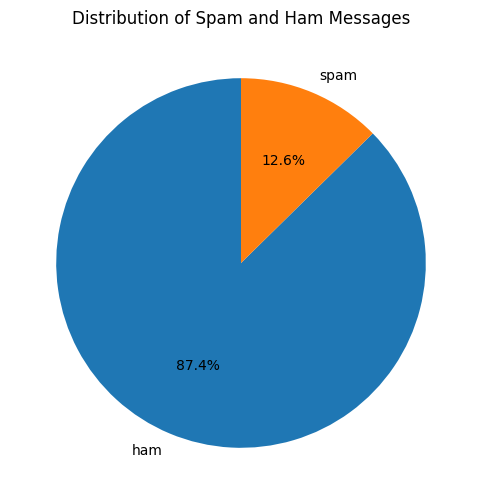

In [27]:
import matplotlib.pyplot as plt

# Get the counts of spam and ham messages
spam_counts = df['target'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(spam_counts, labels=['ham', 'spam'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Spam and Ham Messages')
plt.show()

In [29]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab') # Download the missing resource

df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

display(df.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,target,text,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


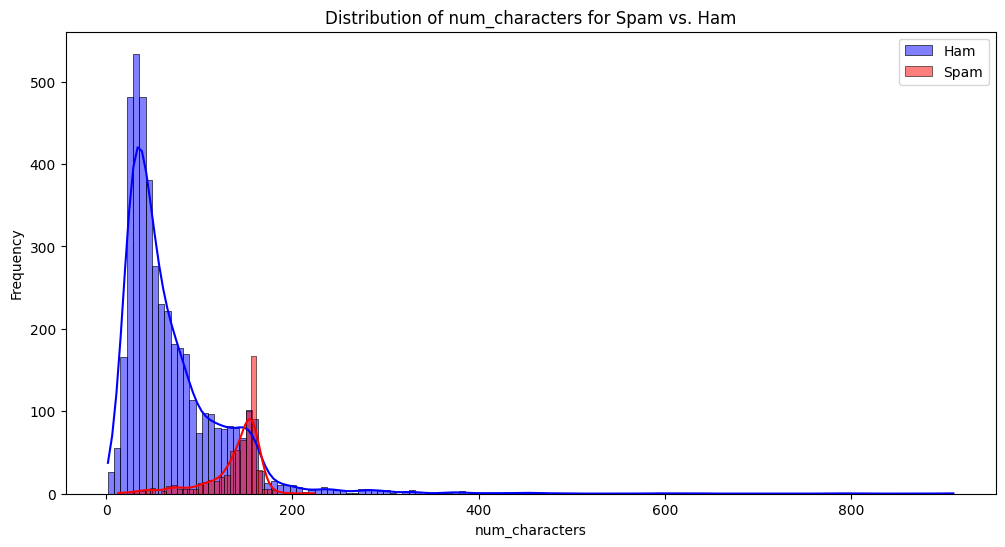

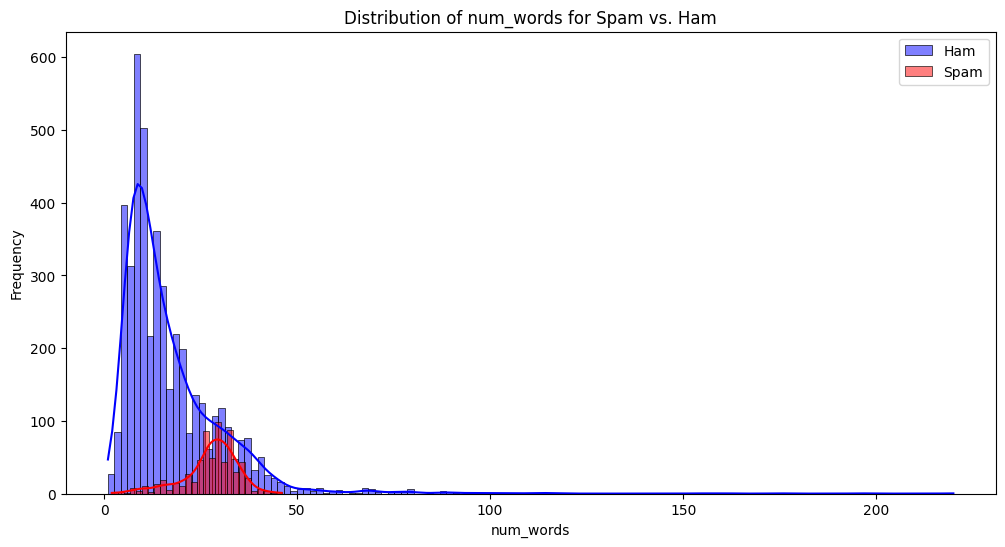

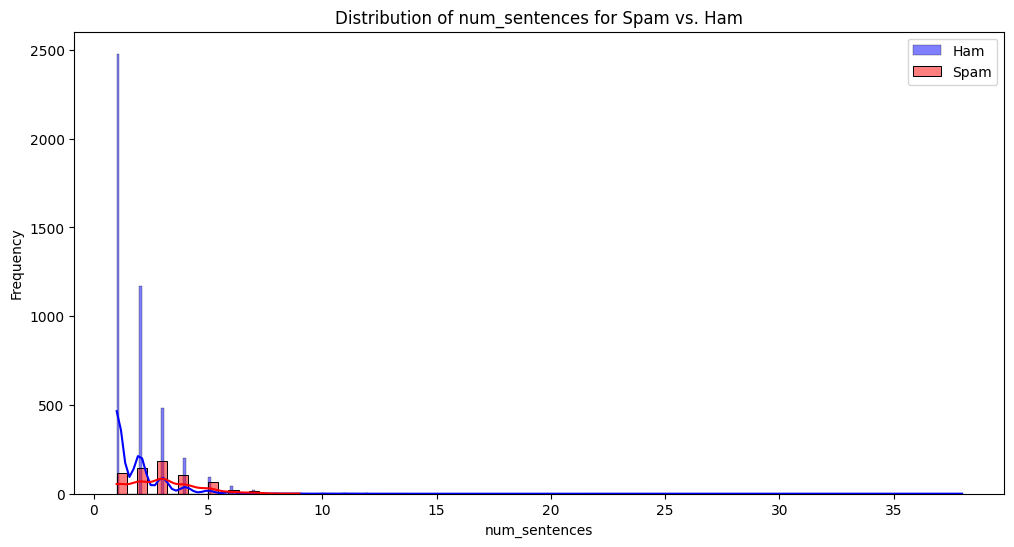

In [30]:
import seaborn as sns

# Plot histograms for each numerical feature, separated by target
for col in ['num_characters', 'num_words', 'num_sentences']:
    plt.figure(figsize=(12, 6))
    sns.histplot(df[df['target'] == 'ham'][col], color='blue', label='Ham', kde=True)
    sns.histplot(df[df['target'] == 'spam'][col], color='red', label='Spam', kde=True)
    plt.title(f'Distribution of {col} for Spam vs. Ham')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

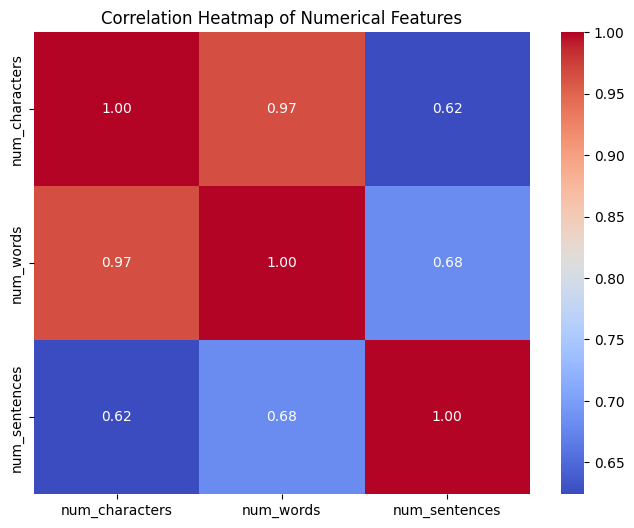

In [31]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df[['num_characters', 'num_words', 'num_sentences']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Data preprocessing


In [34]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

def transform_text(text):
    text = text.lower() # lowercase
    text = nltk.word_tokenize(text) # create tokens

    y = []
    for i in text:
        if i.isalnum(): # remove special characters
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: # remove stop words and punctuation
            y.append(i)

    text = y[:]
    y.clear()

    for i in text: # apply stemming
        y.append(ps.stem(i))

    return " ".join(y)

df['transformed_text'] = df['text'].apply(transform_text)

display(df.head())

,target,text,num_characters,num_words,num_sentences,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [33]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Model bulding

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use TfidfVectorizer instead of CountVectorizer
cv = TfidfVectorizer(max_features=3000) # Limiting features can sometimes help
X = cv.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [42]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Train a Multinomial Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='spam') # Specify pos_label

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{cm}')
print(f'Precision: {precision}')

Accuracy: 0.9709864603481625
Confusion Matrix:
[[896   0]
 [ 30 108]]
Precision: 1.0


In [43]:
import pickle

# Create pickle file for the model
pickle.dump(mnb, open('spam_detector_model.pkl', 'wb'))

# Create pickle file for the vectorizer
pickle.dump(cv, open('tfidf_vectorizer.pkl', 'wb'))

# Task
Create a Gradio app for the spam detection model.

## Install gradio

### Subtask:
Install the Gradio library.


**Reasoning**:
The subtask requires installing the Gradio library. This can be done using pip in a code block.



In [44]:
%pip install gradio

## Load model and vectorizer

### Subtask:
Load the trained Naive Bayes model and TF-IDF vectorizer from the pickle files.


**Reasoning**:
Load the saved model and vectorizer using pickle.



In [45]:
import pickle

loaded_model = pickle.load(open('spam_detector_model.pkl', 'rb'))
loaded_vectorizer = pickle.load(open('tfidf_vectorizer.pkl', 'rb'))

## Define prediction function

### Subtask:
Create a Python function that takes a text message as input, preprocesses it, vectorizes it using the loaded vectorizer, and returns the prediction from the loaded model.


**Reasoning**:
Define a function to predict spam based on input text using the loaded vectorizer and model.



In [46]:
def predict_spam(text):
    # Preprocess the input text
    transformed_text = transform_text(text)

    # Vectorize the preprocessed text
    vectorized_text = loaded_vectorizer.transform([transformed_text])

    # Make a prediction
    prediction = loaded_model.predict(vectorized_text)

    # Return the predicted label
    return prediction[0]


## Create gradio interface

### Subtask:
Build a Gradio interface that takes text input and displays the prediction from the prediction function.


**Reasoning**:
Build a Gradio interface that takes text input and displays the prediction from the prediction function.



In [ ]:
import gradio as gr

# Create a Gradio interface
interface = gr.Interface(
    fn=predict_spam,
    inputs=gr.Textbox(label="Enter your message"),
    outputs=gr.Textbox(label="Prediction"),
    title="Spam Detector",
    description="Enter a message to check if it is spam or ham."
)

# Launch the interface (this would typically be done outside the notebook or in a separate cell for persistent running)
# interface.launch()